<a href="https://colab.research.google.com/github/qudgns147/amon/blob/master/(EDA)bike_sharing_deman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 글씨체 조정
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

# Kaggle Bike Sharing Demand 

*   EDA --> Preprocess --> 회귀  --> Randomforest --> 10Percent 도전
*   항목 추가
# 데이터 분석 방법론

#0. 목적 정의 
 - 분석 목적의 명확화
 - 분석 방법 정의
 
#1. 데이터 모양 확인
 - 단순 시각화 : 목적에 따른 데이터 표현
 
#2. 이상치 확인 및 NA확인

#3. 데이터 전처리
 - NA/이상치 처리 : 전체 삭제 or 평균 대체 or 다른 방법론을 통한 값 예측
 
#4. 분석 전 EDA
 - 범주형
 - 연속형
 - 융합형 (범주+연속)

#5. 분석
 - 회귀
 - randomforest?
 - 10percent

#6. 결론 도출

Reference : 
 - https://www.kaggle.com/kwonyoung234/for-beginner
 - https://www.youtube.com/watch?v=woSEc5d_skE&feature

# 0. 목적 정의

1. 분석 목적 : 2011년도와 2012년도의 자전거 대여 수치에 따라 공란으로 나온 count값에 대한 예측

2. 분석 방법 : 데이터에 대한 EDA 후, 전처리, 분석 전 확인 및 회귀, RNN 등의 기법을 활용하여 예측

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#라이브러리 호출

import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import calendar
from scipy import stats
from datetime import datetime

# 1. 데이터 모양 확인

In [ ]:
train = pd.read_csv('/Users/chaebyeonghun/Documents/ju_first_test/bike-sharing-demand/train.csv', parse_dates=['datetime'])
train.shape

(10886, 12)

In [ ]:
test = pd.read_csv('/Users/chaebyeonghun/Documents/ju_first_test/bike-sharing-demand/test.csv', parse_dates=['datetime'])
test.shape

(6493, 9)

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


 * 데이터의 모양을 보고 연/월/일/시간/분(무의미) / 쉬는 날인지 아닌지에 대한 여부 추가

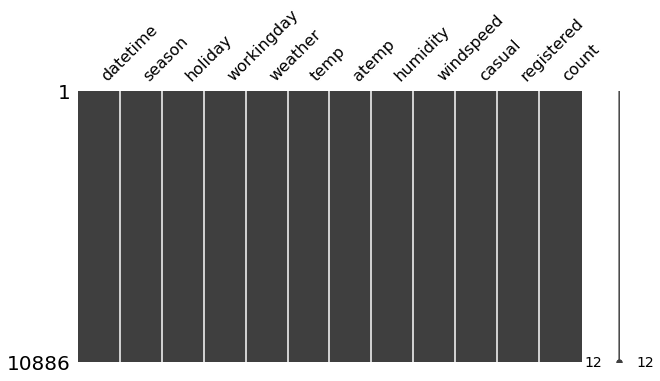

In [ ]:
import missingno as msno
msno.matrix(train, figsize=(10,5))

 * 전체 컬럼에 na값 없음

In [ ]:
train["year"] = train.datetime.dt.year
train["month"] = train.datetime.dt.month
train["day"] = train.datetime.dt.day
train["hour"] = train.datetime.dt.hour
train["minute"] = train.datetime.dt.minute
train["dayofweek"] = train.datetime.dt.dayofweek

train.shape

(10886, 18)

In [ ]:
test["year"] = test.datetime.dt.year
test["month"] = test.datetime.dt.month
test["day"] = test.datetime.dt.day
test["hour"] = test.datetime.dt.hour
test["minute"] = test.datetime.dt.minute
test["dayofweek"] = test.datetime.dt.dayofweek

test.shape

(6493, 15)

In [ ]:
def concate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["year_month"] = train["datetime"].apply(concate_year_month)
test["year_month"] = test["datetime"].apply(concate_year_month)

In [ ]:
print(train.head())
train.info()

             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81        0.0       3          13     16  2011      1    1     0   
1        80        0.0       8          32     40  2011      1    1     1   
2        80        0.0       5          27     32  2011      1    1     2   
3        75        0.0       3          10     13  2011      1    1     3   
4        75        0.0       0           1      1  2011      1    1     4   

   minute  dayofweek year_month  
0       0          5     2011-1  
1     

In [ ]:
print(train.registered.head())
print(train.casual.head())
print(train['count'].head())

0    13
1    32
2    27
3    10
4     1
Name: registered, dtype: int64
0    3
1    8
2    5
3    3
4    0
Name: casual, dtype: int64
0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64


## Data 설명 

* datetime - hourly date + timestamp  
 - 2011-01-01 01:00:00 (연-월-일 1시 0분 0초)
 - 년/월/일/시 별 column 생성
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
 - 1 : 봄, 2 : 여름, 3 : 가을, 4 : 겨울
* holiday - whether the day is considered a holiday
 - 0 : 평일, 1 : 공휴일 여부(주말 제외)
* workingday - whether the day is neither a weekend nor holiday
 - 0 : 쉬는 날, 1: 평일
* weather 
 - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 맑음, 약간 구름
 - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 흐림, 안개 
 - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 약한 눈/비, 천둥
 - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
    - 강한 눈, 우박, 천둥, 안개
* temp - temperature in Celsius
 - 온도
* atemp - "feels like" temperature in Celsius
 - 체감 온도
* humidity - relative humidity
 - 습도
* windspeed - wind speed
 - 바람 속도
* casual - number of non-registered user rentals initiated
 - 처음 사용하는 사람의 수
* registered - number of registered user rentals initiated
 - 원래 등록했던 사람의 사용수
* count - number of total rentals = Test에는 없는 값--> 예측해야 할 값
 - 전체 대여 수 (casual + registered)
* dayofweek - The day of week
 - 0 : Mon, 1 : Tue, 2 : Wed, 3: Thu, 4 : Fri, 5 : Sat, 6 : Sun

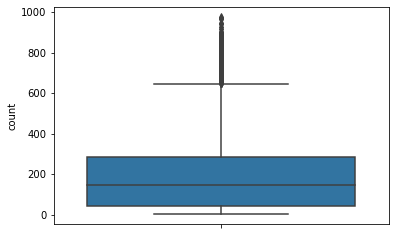

In [ ]:
# 목적 데이터(count) 탐색
sns.boxplot(data=train, y='count', orient='v')

 * 탐색해야 할 데이터의 모양을 살펴봣을때, 극단치의 존재가 데이터의 모양을 변경하고 있는 것으로 확인 해당 데이터 전처리를 할 것인지 결정 필요

In [ ]:
#outlier 탐색 
# outlier = n_i 값과 평균가의 차이가 3*(표준편차)초과인 값

train_without_liers = train[np.abs(train['count'] - train['count'].mean()) <= (3*train['count'].std())]
print(train.shape)
print(train_without_liers.shape)

(10886, 19)
(10739, 19)


* 약 150개의 데이터를 지울 수 있음...적용 여부는 두가지 모두 돌려 본 후 비교

## 시간 데이터 탐색

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'count of hour')]

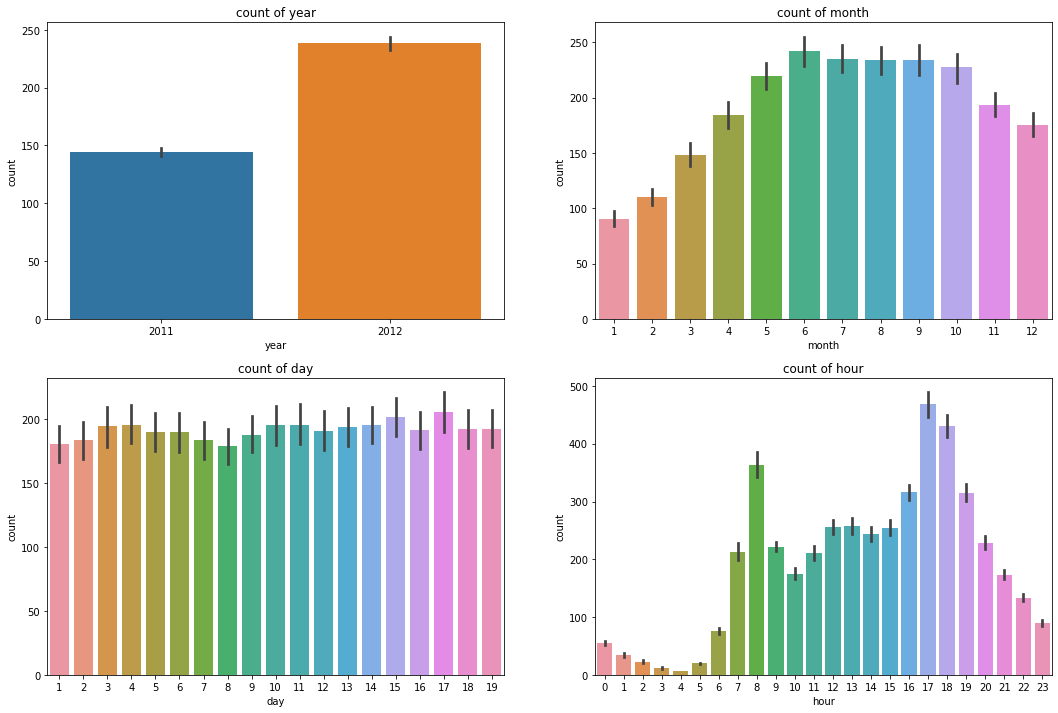

In [ ]:
#연도별, 월별, 일자별, 시간별 시각화
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,12)

sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)
sns.barplot(data=train, x='day', y='count', ax=ax3)
sns.barplot(data=train, x='hour', y='count', ax=ax4)

ax1.set(ylabel='count', title='count of year')
ax2.set(ylabel='count', title='count of month')
ax3.set(ylabel='count', title='count of day')
ax4.set(ylabel='count', title='count of hour')

* 2011년에 비해 2012년에는 약 50%이상의 증가를 했으며, 이는 사용자 풀이 늘어난 것을 확인 할 수 있다.
* 월별로 확인 했을 때, 겨울, 봄에는 사용률이 낮으며, 여름, 가을의 경우 크게 늘어난 것을 확인할 수 있다. 
* 일자별로 봤을 경우, 각 일자가 크게 다르지 않으므로 (유의미한 차이 없음) 일자에 대한 의미는 없는 것으로 판단
  - day = 19일까지 밖에 없음
* 시간대 별로 봤을 경우,출퇴근 시간(8시, 5/6시 등)에 몰려서 사용하며, 취침시간에는 사용률이 가장 저조한 것을 확인할 수 있다.

### 2011년 월별 ->12년 월별 데이터까지 시간순 확인

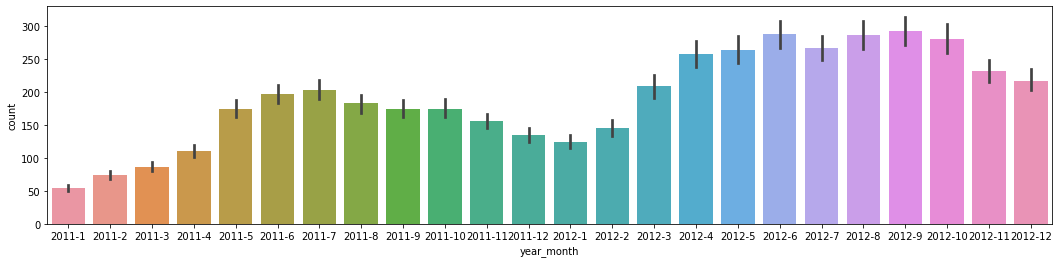

In [ ]:
fig, ax = plt.subplots(nrows=1)
fig.set_size_inches(18,4)

sns.barplot(data=train, x='year_month', y='count', ax=ax)

* 연도별 사용률의 증가는 뚜렷하며, 계절에 따라 사용률의 차이가 명확함을 알 수 있음

## 카테고리 데이터 Categorical Data (Season, Holiday, Working Day, Weather)

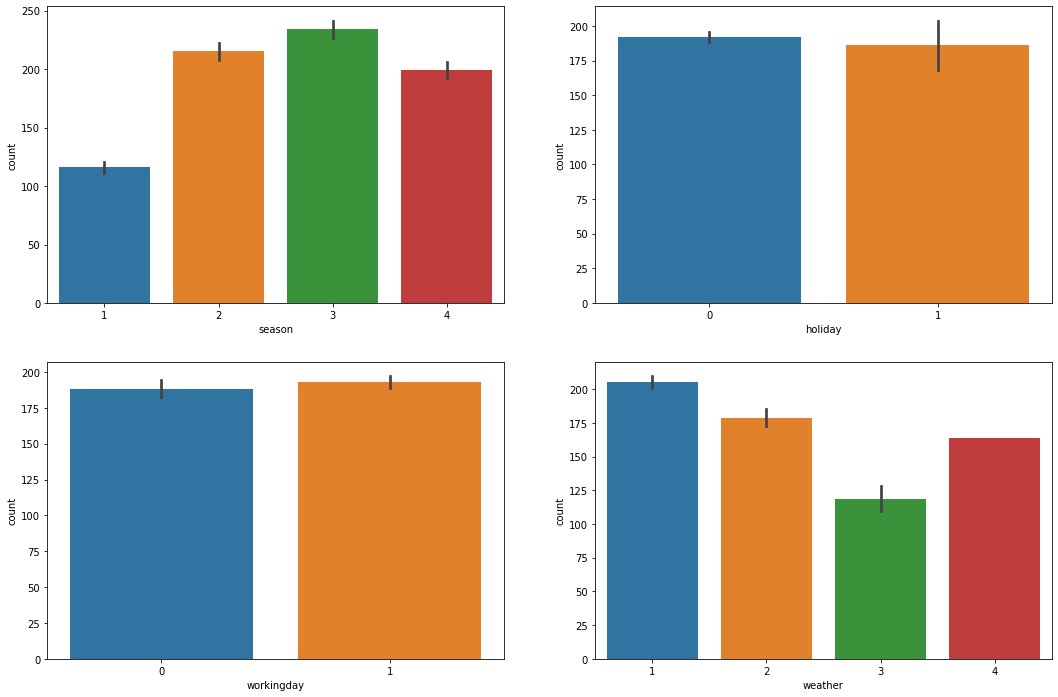

In [ ]:
#계절, 휴일여부, 평일, 날씨
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(18, 12)

sns.barplot(data=train, x='season', y='count', ax=ax1)
sns.barplot(data=train, x='holiday', y='count', ax=ax2)
sns.barplot(data=train, x='workingday', y='count', ax=ax3)
sns.barplot(data=train, x='weather', y='count',ax=ax4)

* 계절 
  * 1 : 1,2,3월 = Spring? 
  * 계절에 대한 탐색 필요
  * 봄에 오히려 사용 수가 가장 적은것에 대한 문제, 수정 필요

* 평일엔 오히려 높고 주말엔 더 쉬어야 하지 않는가? (집돌이의 예상)

* 날씨가 가장 안좋을 때 더 많이 탄다? 편차 바가 없는 것으로 보아 표본수가 매우 적을 것으로 예상 확인필요


In [ ]:
bad_weather = train[train['weather']==4]
bad_weather.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,dayofweek,year_month
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,18,0,0,2012-1


 * 예상과 같이 데이터는 하나밖에 없음
  - 습도는 높으나, 풍속은 강하지 않음
  - 이전 시간 데이터 확인 필요

In [ ]:
train[(train['year']==2012) & (train['month'] == 1) & (train['day']== 9) ]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,dayofweek,year_month
5613,2012-01-09 00:00:00,1,0,1,1,9.84,11.365,60,15.0013,3,12,15,2012,1,9,0,0,0,2012-1
5614,2012-01-09 01:00:00,1,0,1,1,9.84,12.120,60,8.9981,1,4,5,2012,1,9,1,0,0,2012-1
5615,2012-01-09 02:00:00,1,0,1,1,9.84,12.120,56,8.9981,2,3,5,2012,1,9,2,0,0,2012-1
5616,2012-01-09 03:00:00,1,0,1,1,9.84,12.120,52,11.0014,0,3,3,2012,1,9,3,0,0,2012-1
5617,2012-01-09 04:00:00,1,0,1,1,9.02,12.120,64,7.0015,0,4,4,2012,1,9,4,0,0,2012-1
5618,2012-01-09 05:00:00,1,0,1,2,8.20,11.365,64,6.0032,0,21,21,2012,1,9,5,0,0,2012-1
5619,2012-01-09 06:00:00,1,0,1,2,9.02,11.365,60,8.9981,3,85,88,2012,1,9,6,0,0,2012-1
5620,2012-01-09 07:00:00,1,0,1,2,9.02,12.120,60,7.0015,1,239,240,2012,1,9,7,0,0,2012-1
5621,2012-01-09 08:00:00,1,0,1,2,9.02,12.880,55,6.0032,13,407,420,2012,1,9,8,0,0,2012-1
5622,2012-01-09 09:00:00,1,0,1,2,9.02,13.635,64,0.0000,9,188,197,2012,1,9,9,0,0,2012-1


 * 당일의 날씨가 매우 안좋았다는 것을 확인할 수 있음
 * 추가적으로 풍속이 0인 시간 앞뒤로 풍속이 차이가 크기 않다는 것을 확인 할 수 있음.
  - 차후 풍속 0 인 데이터에 대한 후처리 필요
  - 1. 계획상 randomforest를 돌려 확인한다
  - 2. 수학적으로 명확한 방법을 위하여 풍속이 0인 시간 전후값의 평균값으로 수정한 데이터 세트도 산출하여 비교할 필요성 있음

### Holiday 확인
* 일하는 날인지가 더 중요하지 않을까 

In [ ]:
train.dayofweek.value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

* 날짜의 차이는 크게 나지 않음

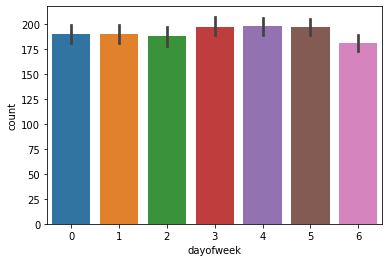

In [ ]:
sns.barplot(data=train, x='dayofweek', y='count')

* 5, 6 =  주말, 생각보다 사용률이 매우 높음. 
* 평일만큼 주말에도 많이 탄다는 결론
* 일요일에 가장 적음 (유의미해 보이지는 않음)

## 수치형 데이터들에 대한 시각화
- 온도 (temp)
- 체감온도 (atemp)
- 습도 (humidity)
- 풍속 (windspeed)

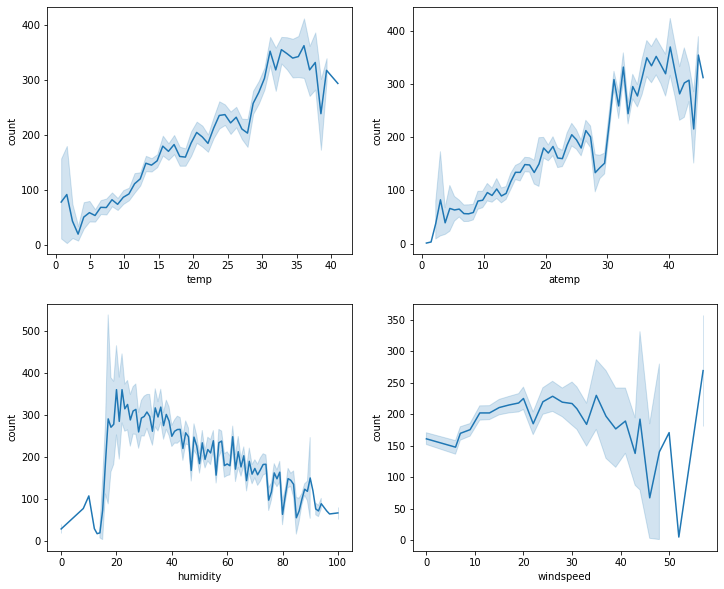

In [ ]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)

sns.lineplot(data=train, x='temp', y='count', ax=ax1)
sns.lineplot(data=train, x='atemp', y='count', ax=ax2)
sns.lineplot(data=train, x='humidity', y='count', ax=ax3)
sns.lineplot(data=train, x='windspeed', y='count', ax=ax4)

* temp, atemp는 유사한 모양으로, 온도와 체감온도가 크게 다르지 않음을 예상할 수 있음
 - 그에 따라 사용률 또한 유사한 모양을 그리는 것을 확인할 수 있음
* 습도의 경우, 20미만의 수치에 대해 변동성(옅은 색)이 크게 없음을 보아, 극소수의 숫자로 나타나는 것으로 보임
* 풍속의 경우, 풍속이 낮을 때는 일관적인 변동폭을 보이지만, 퐁속이 높아질수록 사용률 변동이 매우 커짐 
 - 풍속에 대한 추가 설명 필요

## 풍속 데이터 탐색

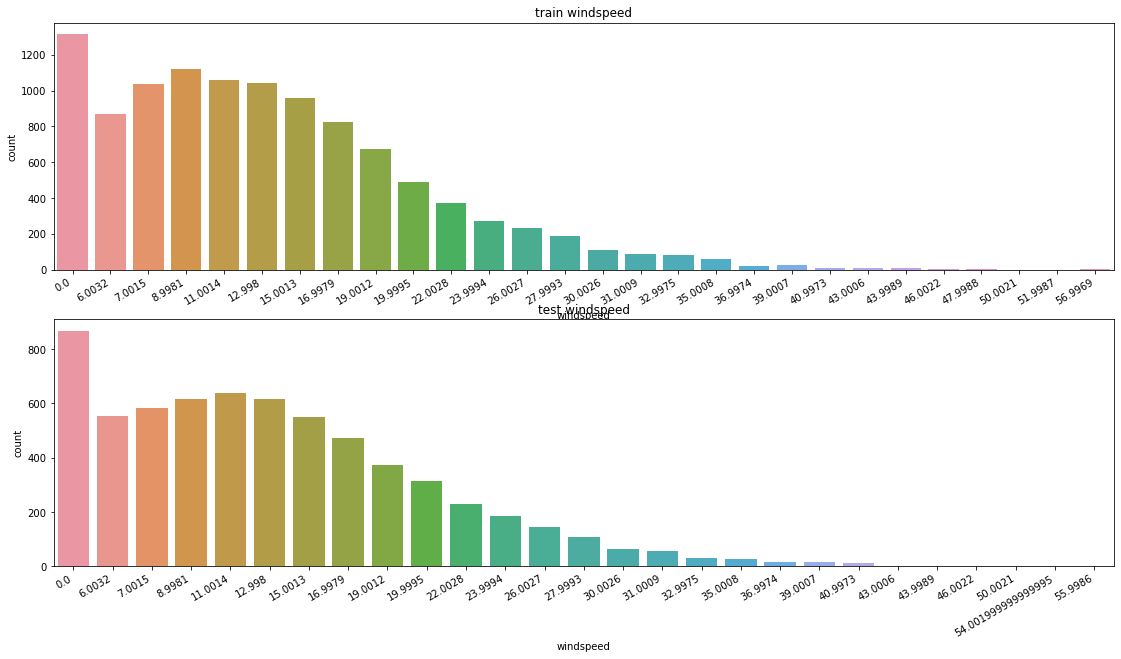

In [ ]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(19,10)

plt.sca(axes[0])
plt.xticks(rotation=30, ha='right')
axes[0].set(ylabel='count', title='train windspeed')
sns.countplot(data=train, x='windspeed', ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].set(ylabel='count', title='test windspeed')
sns.countplot(data=test, x='windspeed', ax=axes[1])

* 예상과 같이 풍속이 0인 데이터가 매우 많음 
 - 실제로 바람이 0인지 측정이 안된 것인지 확인필요
 - 풍속이 0 인 데이터의 전/후로 데이터 값이 있다면 누락으로 판단
 - 없다면 실제 풍속이 0일 수 있을 듯

# 3. 데이터 전처리
 * outlier 처리 : 비정상적인값(편차 > 3*표준편차) 확인 및 처리
 * NA/이상치 처리 : 전체 삭제 or 평균 대체 or 다른 방법론을 통한 값 예측

# 계절 재정의
* 봄 : 3,4,5 
* 여름 : 6, 7, 8
* 가을 : 9, 10, 11
* 겨울 : 12, 1, 2

ref. https://ko.weatherspark.com/y/23912/%EB%AF%B8%EA%B5%AD-%EB%89%B4%EC%9A%95-%EC%A3%BC-%EB%89%B4%EC%9A%95%EC%9D%98-%EB%85%84%EC%A4%91-%ED%8F%89%EA%B7%A0-%EB%82%A0%EC%94%A8

In [ ]:
#train 및 test 데이터 모두 변경
def to_right_season(month):
  if month in [3, 4, 5]:
    return 1
  elif month in [6,7,8] :
    return 2
  elif month in [9,10, 11]:
    return 3
  else : return 4

train['season'] = train.month.apply(to_right_season)
test['season'] = test.month.apply(to_right_season)

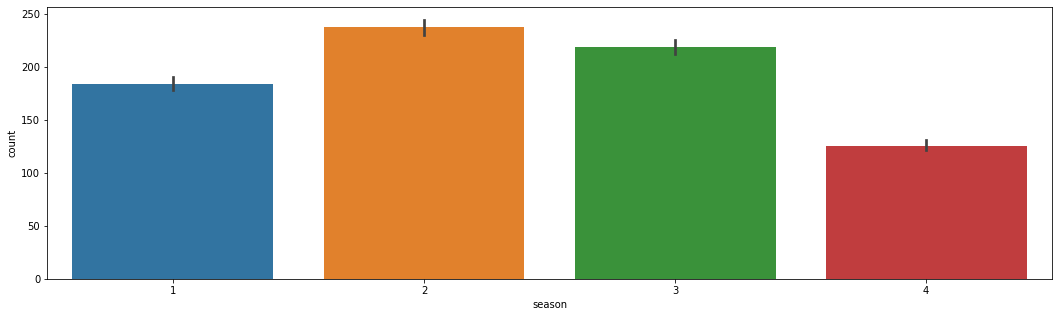

In [ ]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(18,5)
sns.barplot(data=train, x='season', y='count', ax=ax)


* 예상과 같이 봄, 겨울에 사용률이 저조함

## 풍속데이터 전처리
* 풍속이 0인 데이터만 추려 연속되는지 확인하고, 연속되는 데이터들이 아니라면, 다음을 수행
* 풍속이 0인 데이터가 연속되면 randomforest 값 활용

In [ ]:
# 풍속이 0인 값에 대해 확인
train_wind0 = train[train['windspeed']==0]
train_wind0

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,dayofweek,year_month
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,5,2011-1
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,5,2011-1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,5,2011-1
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,5,2011-1
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,5,2011-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87,0.0,21,211,232,2012,12,17,12,0,0,2012-12
10829,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88,0.0,15,196,211,2012,12,17,15,0,0,2012-12
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,0.0,10,652,662,2012,12,18,8,0,1,2012-12
10860,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49,0.0,5,127,132,2012,12,18,22,0,1,2012-12


* windspeed가 0인값은 연속적인것과 연속적이지 않은 것들이 섞여 있음
* 세부적으로 다음 세트로 나눔
 - train_rand = 풍속0에 대해 randomforest를 돌려 예측
 - train_mean = 풍속이 0인 데이터의 앞뒤 값의 평균
 - train_rmean = 연속되는 풍속0은 randomforest 값, 연속되지 않으면 앞뒤 평균

In [ ]:
# randomforest
from sklearn.ensemble import RandomForestClassifier

def predict_wind(data):
    
    #windspeed가 0인 값과 아닌 값 구분
    data_wind0 = data.loc[data['windspeed']==0]
    data_windnot0 = data.loc[data['windspeed']!=0]
    
    #예측할 때 사용할 feature = 컬럼들 (연도와 날짜는 상관이 없을 것으로 예측(1년 사이의 일이기 때문))
    wCol = ['season', 'weather', 'humidity', 'month', 'temp', 'atemp']
    
    #문자열로 변환 (분류를 활용하기에)
    data_windnot0["windspeed"] = data_windnot0['windspeed'].astype('str')
    
    
    # 랜덤포레스트 분류기를 사용한다.
    rfModel_wind = RandomForestClassifier()

    # wCol에 있는 피처의 값을 바탕으로 풍속을 학습시킨다.
    rfModel_wind.fit(data_windnot0[wCol], data_windnot0["windspeed"])

    # 학습한 값을 바탕으로 풍속이 0으로 기록된 데이터의 풍속을 예측한다.
    wind0Values = rfModel_wind.predict(X = data_wind0[wCol])

    # 값을 다 예측 후 비교해 보기 위해
    # 예측한 값을 넣어 줄 데이터 프레임을 새로 만든다.
    predictWind0 = data_wind0
    predictWindNot0 = data_windnot0
    
    #예측한 값을 풍속 0인 데이터에 취합
    predictWind0["windspeed"] = wind0Values
    
    #0인 데이터와 아닌 데이터 취합하여 새로운 데이터 생성
    data_rand = predictWindNot0.append(predictWind0)
    
    #실수 형태로 
    data_rand['windspeed'] = data_rand['windspeed'].astype('float')
    
    data_rand.reset_index(inplace=True)
    data_rand.drop('index', inplace=True, axis=1)
    
    return data_rand
    

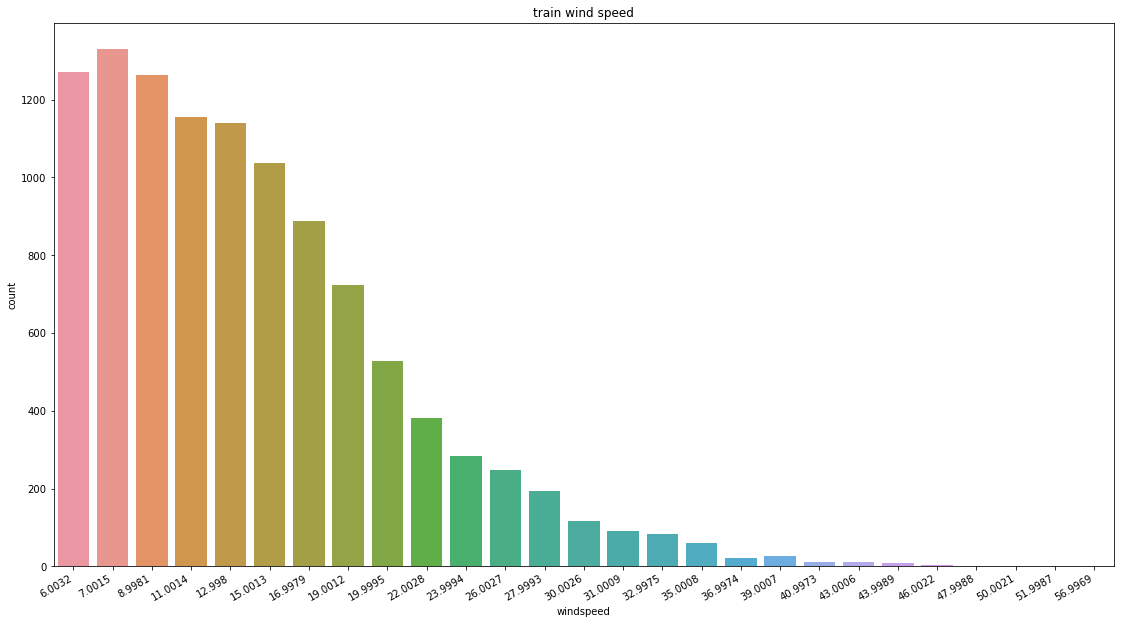

In [ ]:
train_rand = predict_wind(train)

fig, ax1=  plt.subplots()
fig.set_size_inches(19, 10)

plt.sca(ax1)
plt.xticks(rotation=30, ha = 'right')
ax1.set(ylabel = 'count' , title = 'train wind speed')
sns.countplot(data=train_rand, x='windspeed', ax=ax1)

In [ ]:
#train_mean
def wind_mean(train):
    wind_mean1 = train
    for i in (train[train['windspeed']==0]).index:
        if (i>0):
            if (((train.loc[i-1, 'windspeed'] + train.loc[i+1,'windspeed'])/2) > 1) :
                wind_mean1.loc[i,'windspeed'] = (train.loc[i-1, 'windspeed'] + train.loc[i+1,'windspeed'])/2
    return wind_mean1

In [ ]:
train_mean = wind_mean(train)

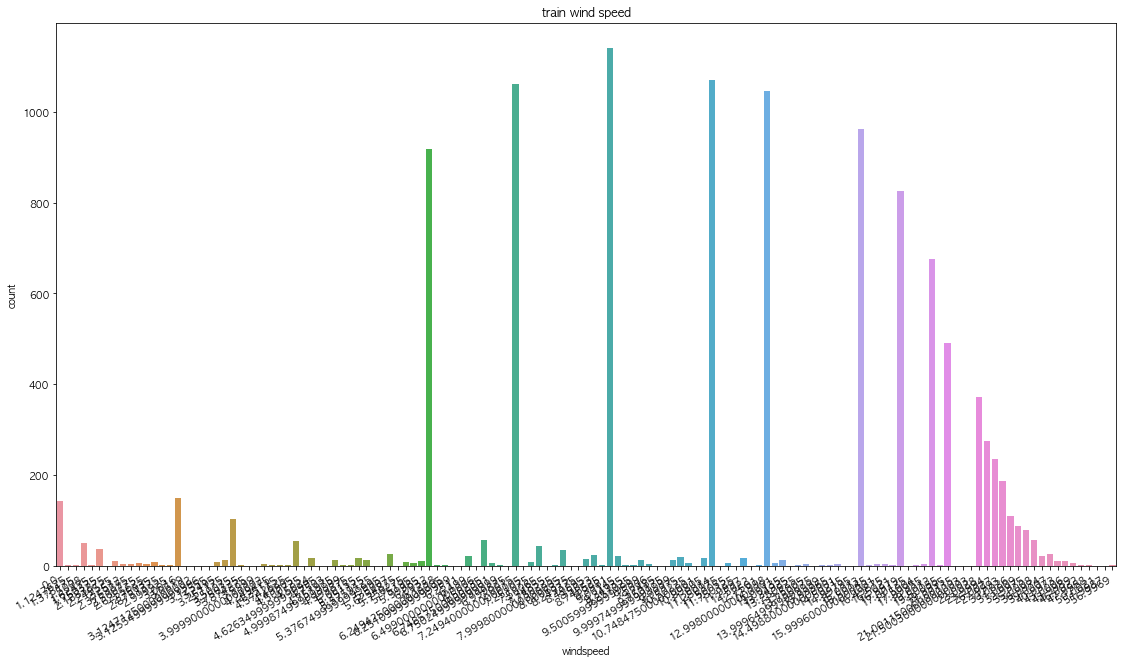

In [ ]:
fig, ax1=  plt.subplots()
fig.set_size_inches(19, 10)

plt.sca(ax1)
plt.xticks(rotation=30, ha = 'right')
ax1.set(ylabel = 'count' , title = 'train wind speed')
sns.countplot(data=train_mean, x='windspeed', ax=ax1)

In [ ]:
# train_rmean
def rmean(data):
    #풍속이 0인 데이터와 아닌 데이터 분리
    wind0 = (data[data['windspeed']==0]).index
    for i in wind0 :
        if ((i-1, i+1) in wind0) :
            data.loc[i,'windspeed'] = train_rand.loc[i, 'windspeed']
        else:
            data.loc[i,'windspeed'] = train_mean.loc[i, 'windspeed']
    return data

In [ ]:
train_rmean = rmean(train)

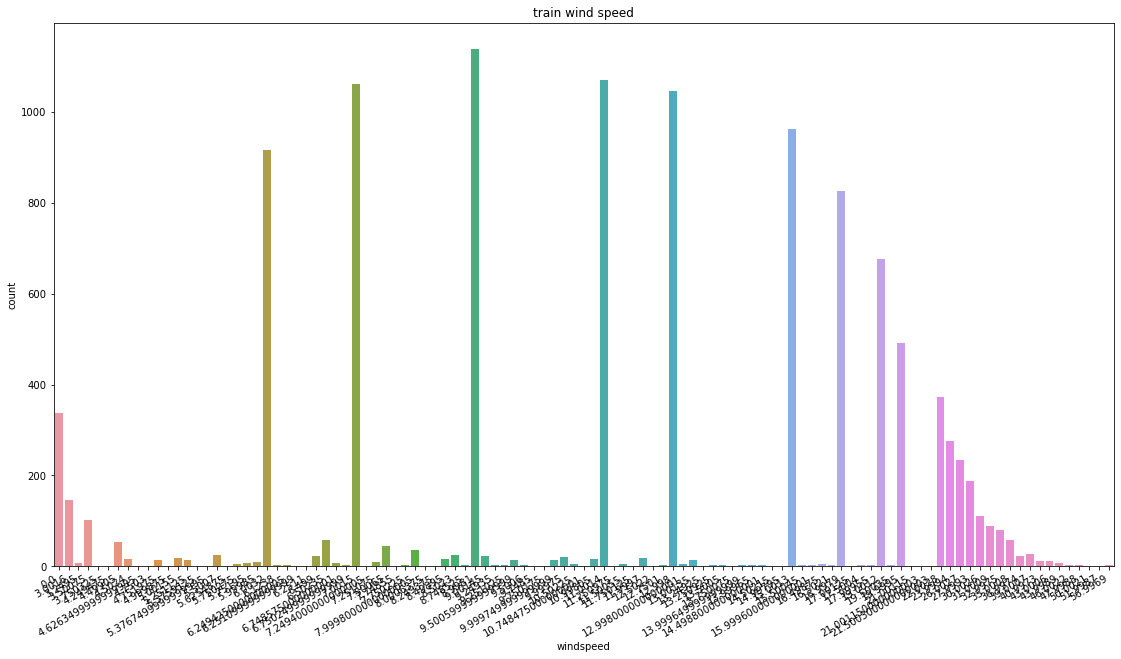

In [ ]:
fig, ax1=  plt.subplots()
fig.set_size_inches(19, 10)

plt.sca(ax1)
plt.xticks(rotation=30, ha = 'right')
ax1.set(ylabel = 'count' , title = 'train wind speed')
sns.countplot(data=train_rmean, x='windspeed', ax=ax1)

* 거의 모든 0의 값이 연속된 것을 확인할 수 있음

# 4. 분석 전 EDA

* Feature Selection을 위한 EDA
* 각 데이터 별 count와 관련성 확인을 위한 시각화

(10886, 19)
(10739, 19)


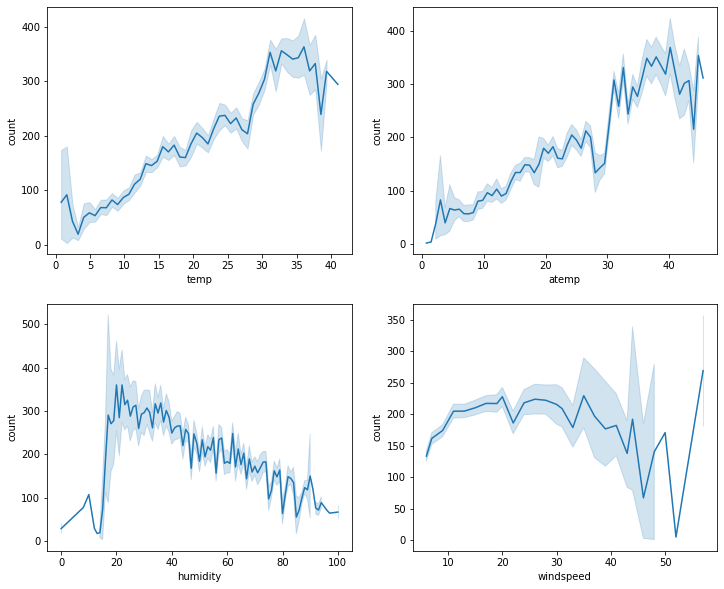

In [ ]:
# 수치형 (randomforest)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)

sns.lineplot(data=train_rand, x='temp', y='count', ax=ax1)
sns.lineplot(data=train_rand, x='atemp', y='count', ax=ax2)
sns.lineplot(data=train_rand, x='humidity', y='count', ax=ax3)
sns.lineplot(data=train_rand, x='windspeed', y='count', ax=ax4)

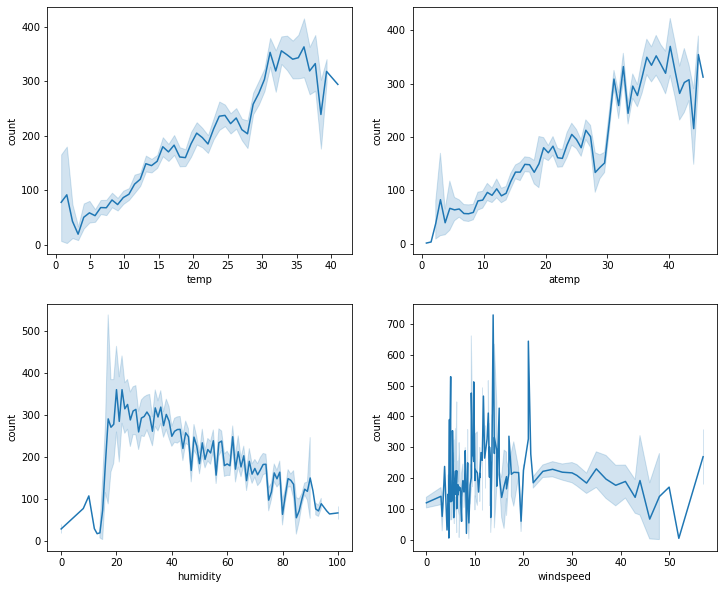

In [ ]:
#mean
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)

sns.lineplot(data=train_mean, x='temp', y='count', ax=ax1)
sns.lineplot(data=train_mean, x='atemp', y='count', ax=ax2)
sns.lineplot(data=train_mean, x='humidity', y='count', ax=ax3)
sns.lineplot(data=train_mean, x='windspeed', y='count', ax=ax4)

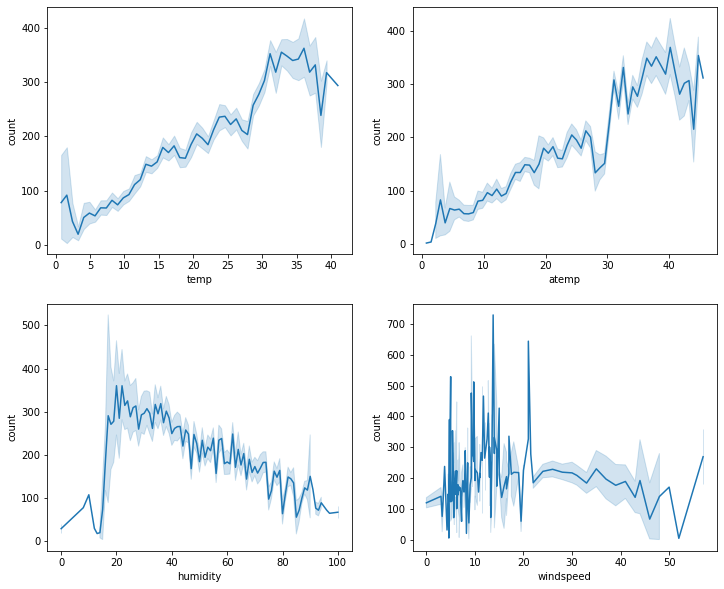

In [ ]:
#rand+mean
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)

sns.lineplot(data=train_rmean, x='temp', y='count', ax=ax1)
sns.lineplot(data=train_rmean, x='atemp', y='count', ax=ax2)
sns.lineplot(data=train_rmean, x='humidity', y='count', ax=ax3)
sns.lineplot(data=train_rmean, x='windspeed', y='count', ax=ax4)

* 평균값으로 조정할 경우 count의 변화량이 급격하게 커짐
* 특히 풍속이 낮을 때 count 값의 변화가 심함 다른 요인이 개입된 것이거나, 예측을 잘못했을 경우

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, '근무일 여부에 따른 대여량')]

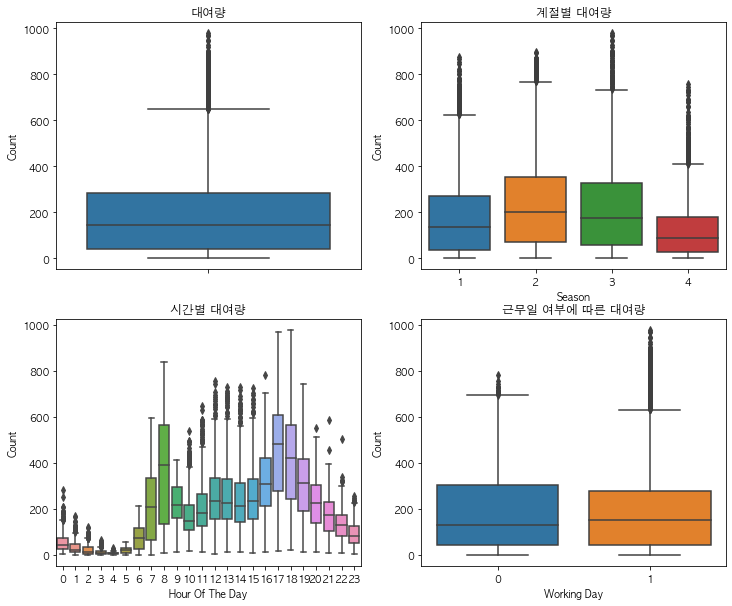

In [ ]:
# categorical data
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=train,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=train,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=train,y="count",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=train,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="대여량")
axes[0][1].set(xlabel='Season', ylabel='Count',title="계절별 대여량")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="시간별 대여량")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="근무일 여부에 따른 대여량")

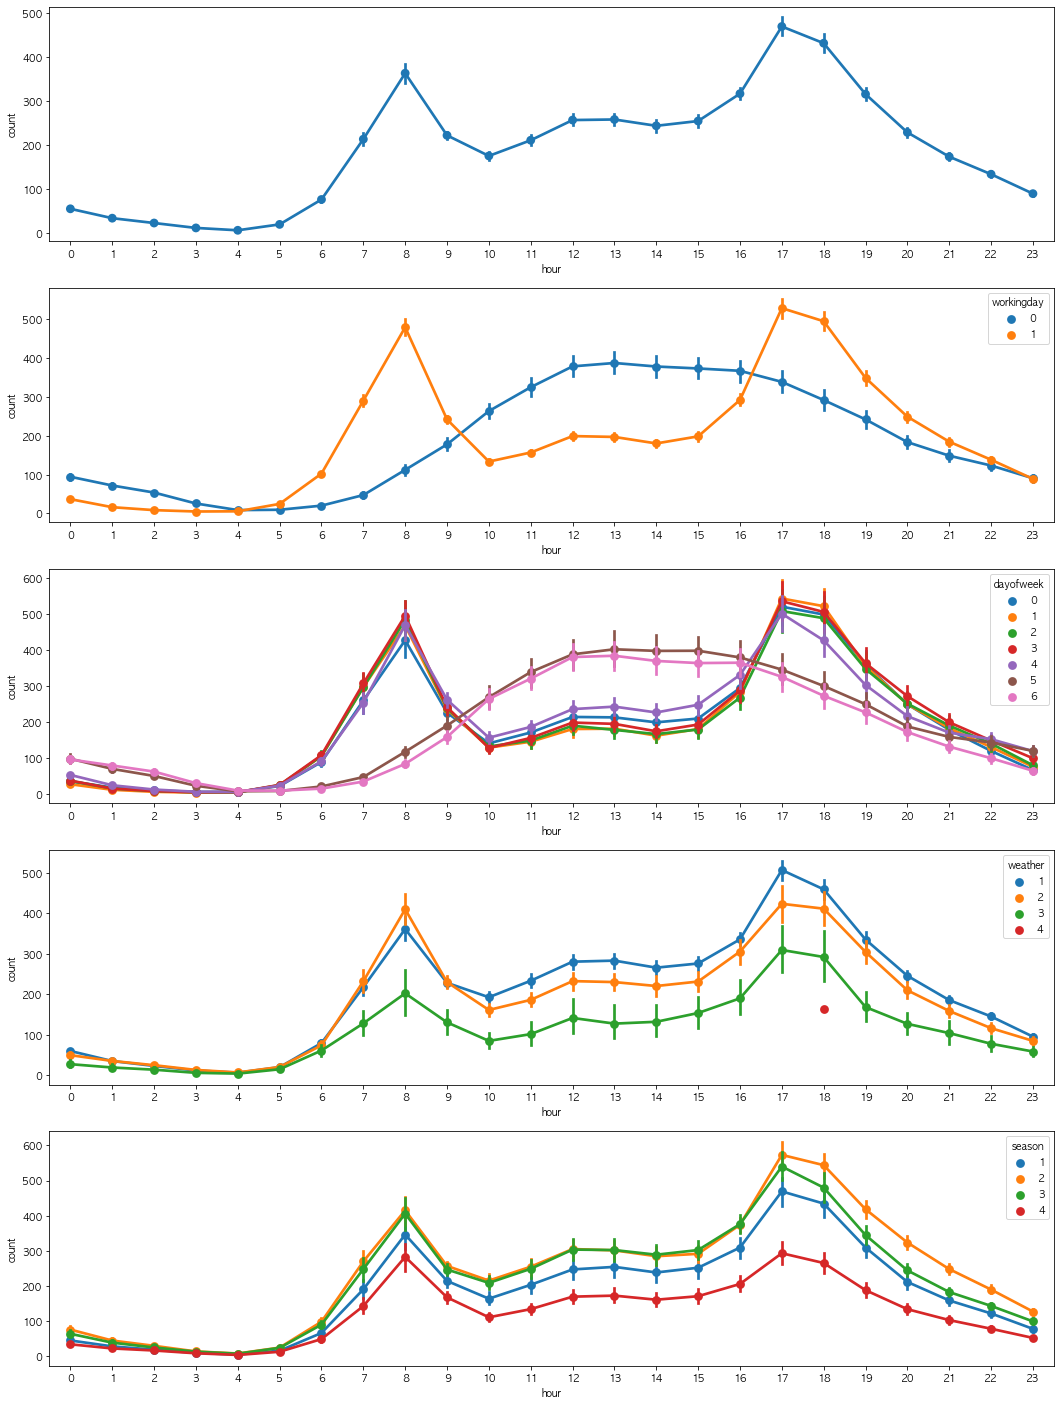

In [ ]:
#융합형 - 시각화
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=train, x= "hour" , y = "count" , ax= ax1)
sns.pointplot(data=train, x= "hour", y="count", hue="workingday", ax=ax2)
sns.pointplot(data=train, x="hour", y="count", hue="dayofweek", ax=ax3)
sns.pointplot(data=train, x="hour", y="count", hue= "weather", ax=ax4)
sns.pointplot(data=train, x="hour", y= "count", hue="season", ax=ax5)

* 이전 EDA와 같이, 출퇴근 시간에 사용빈도가 가장 높고, 날씨가 좋고, 평일일때 가장 많이 사용한다는 것을 확인할 수 있다.

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.005964   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.044785   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.106593   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.099840   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.345574   
windspeed  -0.005964 -0.044785  0.106593    0.099840 -0.345574   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.112646   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.112646  
count       1.000000  


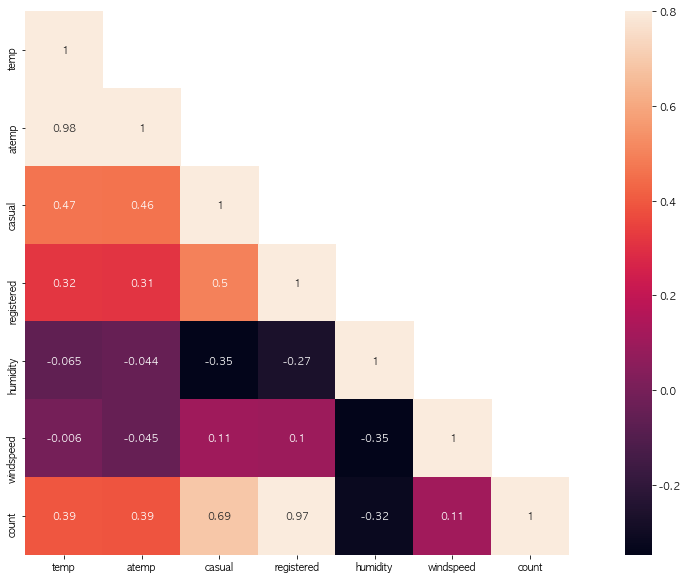

In [ ]:
# 상관계수 확인(수치형-원본 데이터)
corrMatt= train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949   0.006570   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.030046   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.110061   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.093332   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.341384   
windspeed   0.006570 -0.030046  0.110061    0.093332 -0.341384   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.108176   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.108176  
count       1.000000  


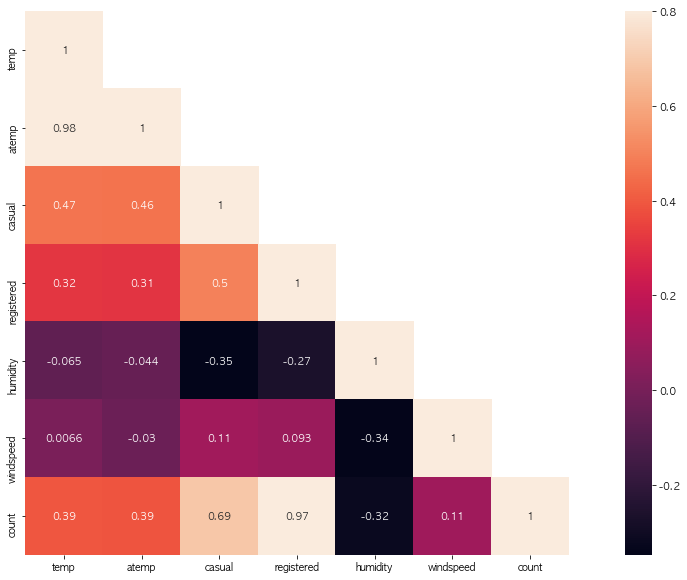

In [ ]:
# 상관계수 확인(수치형-randomforest)
corrMatt= train_rand[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.005964   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.044785   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.106593   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.099840   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.345574   
windspeed  -0.005964 -0.044785  0.106593    0.099840 -0.345574   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.112646   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.112646  
count       1.000000  


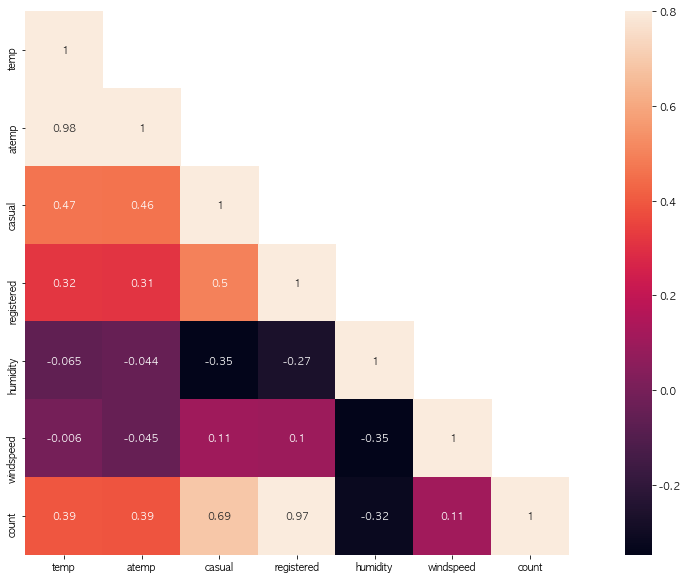

In [ ]:
# 상관계수 확인(수치형-mean)
corrMatt= train_mean[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

* windspeed의 변화를 주어봤지만 큰 상관이 없는 것으로보임
* register의 경우 높은 상관계수를 보여주지만, test에는 해당 값이 없음

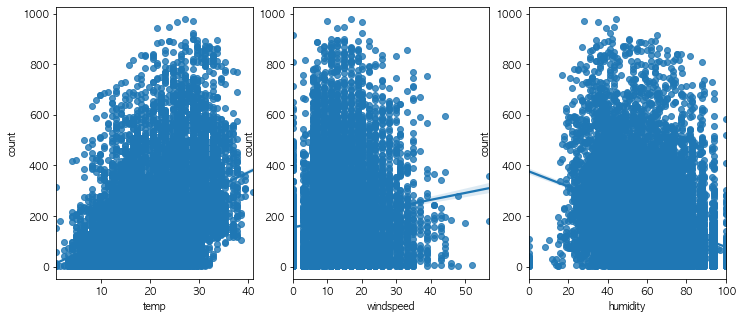

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x="temp", y="count", data=train,ax=ax1)
sns.regplot(x="windspeed", y="count", data=train,ax=ax2)
sns.regplot(x="humidity", y="count", data=train,ax=ax3)

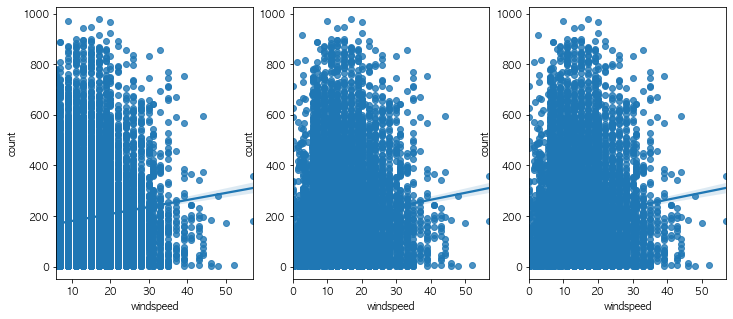

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x="windspeed", y="count", data=train_rand,ax=ax1)
sns.regplot(x="windspeed", y="count", data=train_mean,ax=ax2)
sns.regplot(x="windspeed", y="count", data=train_rmean,ax=ax3)

* 각 전처리 값에 따라 크게 유의미한 변화는 없는 것으로 보임

((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229776, 4.562423868087808, 0.9581176780909612))

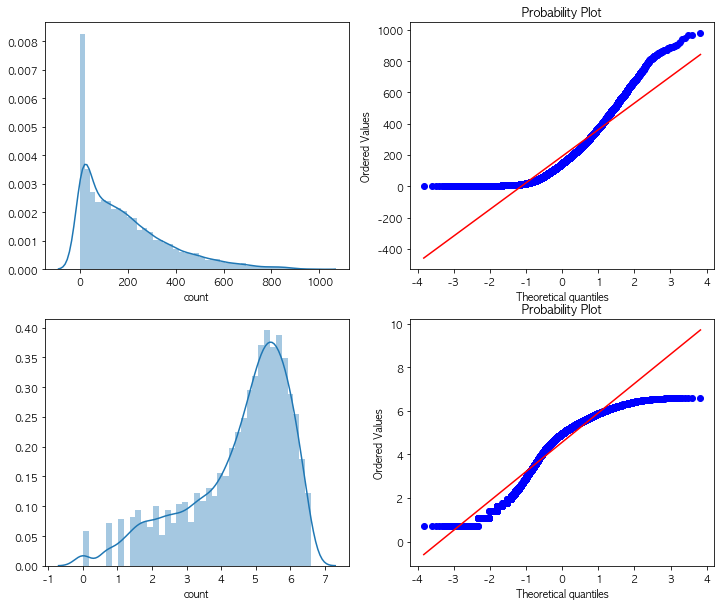

In [ ]:
# count 값의 데이터 분포도를 파악

figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12, 10)

sns.distplot(train["count"], ax=axes[0][0])
stats.probplot(train["count"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(train_without_liers["count"]), ax=axes[1][0])
stats.probplot(np.log1p(train_without_liers["count"]), dist='norm', fit=True, plot=axes[1][1])

* count 변수가 오른쪽에 치우쳐져 있다. 대부분의 기계학습은 종속변수가 normal이어야 하기에 정규분포를 갖는 것이 바람직하다.
* 대안으로 outlier data를 제거하고 count 변수에 로그를 씌워 변경해 봐도 정규분포를 따르지는 않지만, 이전 그래프보다는 좀 더 자세히 표현하고 있다.
* ref:https://programmers.co.kr/learn/courses/21/lessons/942